In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read Data


In [ ]:
pizza_sales=pd.read_csv("pizza_sales.csv")


Read the first 5 rows

In [ ]:
pizza_sales.head()

,pizza_id,order_id,pizza_name_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,01-01-2015,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,01-01-2015,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,01-01-2015,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,01-01-2015,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,01-01-2015,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


some info about the number

In [ ]:
pizza_sales.describe()

,pizza_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


some info about the data

In [ ]:
pizza_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   pizza_id           48620 non-null  int64  
 1   order_id           48620 non-null  int64  
 2   pizza_name_id      48620 non-null  object 
 3   quantity           48620 non-null  int64  
 4   order_date         48620 non-null  object 
 5   order_time         48620 non-null  object 
 6   unit_price         48620 non-null  float64
 7   total_price        48620 non-null  float64
 8   pizza_size         48620 non-null  object 
 9   pizza_category     48620 non-null  object 
 10  pizza_ingredients  48620 non-null  object 
 11  pizza_name         48620 non-null  object 
dtypes: float64(2), int64(3), object(7)
memory usage: 4.5+ MB


KPIS

In [ ]:
#Total Rev
total_rev=pizza_sales['total_price'].sum()
print(total_rev)
#total_QTY
Total_QTY=pizza_sales['quantity'].sum()
print(Total_QTY)
#total_Orders
Total_Orders=pizza_sales['order_id'].nunique()
print(Total_Orders)
#AOV
AOV=total_rev/Total_Orders
print(AOV)
#avr pizza per order
Avg_Pizza_per_order=Total_QTY/Total_Orders
print(Avg_Pizza_per_order)


817860.05
49574
21350
38.30726229508197
2.321967213114754


Text(0.5, 0.4, '817860.05')

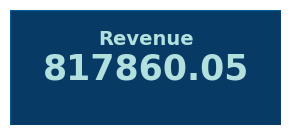

In [ ]:
title="Revenue"
value=total_rev
#draw Card
fig,ax=plt.subplots(figsize=(3.5,1.5))
ax.axis('off')
#draw Rectangle
rect=plt.Rectangle((0,0),1,1,color='#083a66',ec='#045a93')
ax.add_patch(rect)
#text
ax.text(0.5,0.7,title,ha='center',fontsize=14,color='#b2e0de',fontweight='600')
ax.text(0.5,0.4,value,ha='center',fontsize=25,color='#b2e0de',fontweight='600')

write function draw rectangle

In [ ]:
def draw_rect(title, value):
  fig,ax=plt.subplots(figsize=(3.5,1.5))
  ax.axis('off')
  #draw Rectangle
  rect=plt.Rectangle((0,0),1,1,color='#083a66',ec='#045a93')
  ax.add_patch(rect)
  #text
  ax.text(0.5,0.7,title,ha='center',fontsize=14,color='#b2e0de',fontweight='600')
  ax.text(0.5,0.4,f'{value: .1f}',ha='center',fontsize=25,color='#b2e0de',fontweight='600')


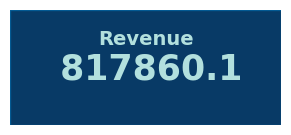

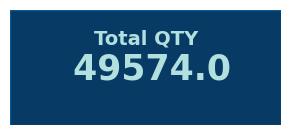

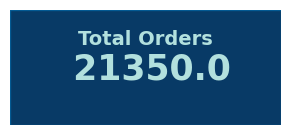

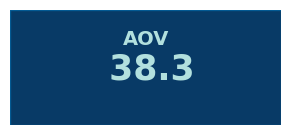

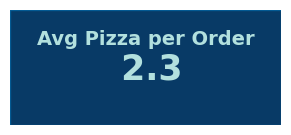

In [ ]:
draw_rect("Revenue",total_rev)
draw_rect("Total QTY",Total_QTY)
draw_rect("Total Orders",Total_Orders)
draw_rect("AOV",AOV)
draw_rect("Avg Pizza per Order",Avg_Pizza_per_order)

Analysis ingredtients


In [ ]:
Ingredients=(
    pizza_sales['pizza_ingredients'].
    str.split(',').
    explode().
    value_counts().
    reset_index()
)

In [ ]:
Ingredients

,pizza_ingredients,count
0,Garlic,27422
1,Tomatoes,23694
2,Red Onions,19547
3,Red Peppers,16284
4,Chicken,8443
...,...,...
68,Brie Carre Cheese,480
69,Prosciutto,480
70,Caramelized Onions,480
71,Pears,480


In [ ]:
type(pizza_sales['order_date'][0])

str

/tmp/ipython-input-3093458268.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart=pizza_sales.groupby('day_name',as_index=False)['total_price'].sum()
/tmp/ipython-input-3093458268.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart,x='day_name',y='total_price',palette='magma')


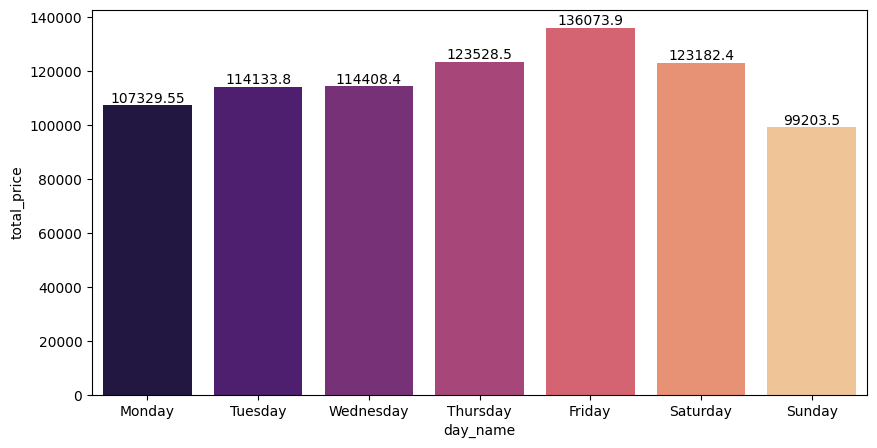

In [ ]:
pizza_sales['order_date']=pd.to_datetime(pizza_sales['order_date'],dayfirst=True)
pizza_sales['day_name']=pizza_sales['order_date'].dt.day_name()
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pizza_sales['day_name']=pd.Categorical(pizza_sales['day_name'],categories=week,ordered=True)
chart=pizza_sales.groupby('day_name',as_index=False)['total_price'].sum()
plt.figure(figsize=(10,5))
sns.barplot(data=chart,x='day_name',y='total_price',palette='magma')

for x,y in enumerate(chart['total_price']):
    plt.text(x,y,y,ha='center',va='bottom')


Total QTY per Day

/tmp/ipython-input-3954617439.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart=pizza_sales.groupby('day_name',as_index=False)['quantity'].sum()
/tmp/ipython-input-3954617439.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart,x='day_name',y='quantity',palette='magma')


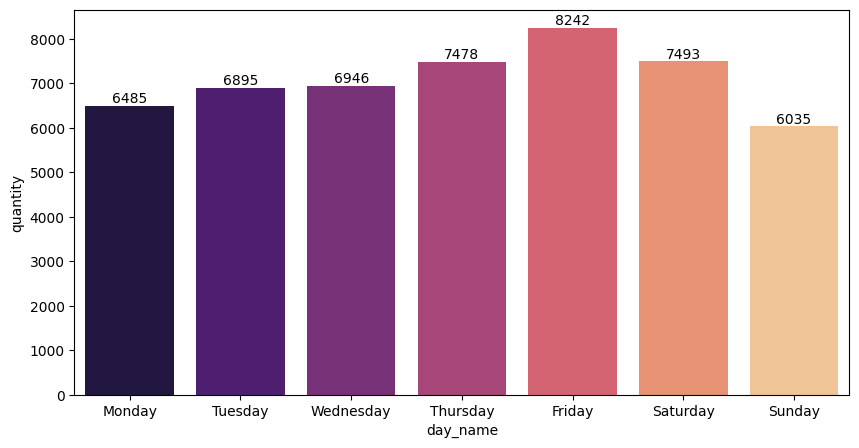

In [ ]:
pizza_sales['order_date']=pd.to_datetime(pizza_sales['order_date'],dayfirst=True)
pizza_sales['day_name']=pizza_sales['order_date'].dt.day_name()
week=['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
pizza_sales['day_name']=pd.Categorical(pizza_sales['day_name'],categories=week,ordered=True)
chart=pizza_sales.groupby('day_name',as_index=False)['quantity'].sum()
plt.figure(figsize=(10,5))
sns.barplot(data=chart,x='day_name',y='quantity',palette='magma')

for x,y in enumerate(chart['quantity']):
    plt.text(x,y,y,ha='center',va='bottom')

Hour trend

In [ ]:
type(pizza_sales['order_time'][0])

str

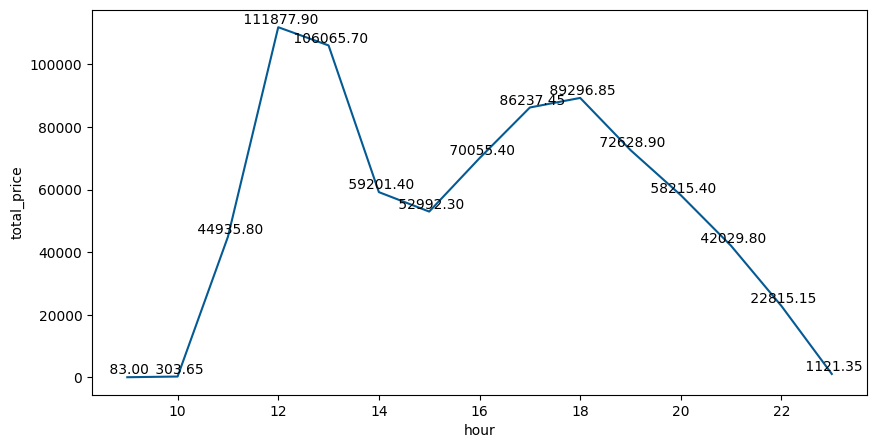

In [ ]:
pizza_sales['order_time']=pd.to_datetime(pizza_sales['order_time'],format='%H:%M:%S')
pizza_sales['hour']=pizza_sales['order_time'].dt.hour
chart=pizza_sales.groupby('hour',as_index=False)['total_price'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(data=chart,x='hour',y='total_price',color='#045a93')
for x,y in enumerate(chart['total_price']):
    right_x=chart['hour'].iloc[x]
    plt.text(right_x,y,f'{y: .2f}',ha='center',va='bottom')

Hour trend by QTY

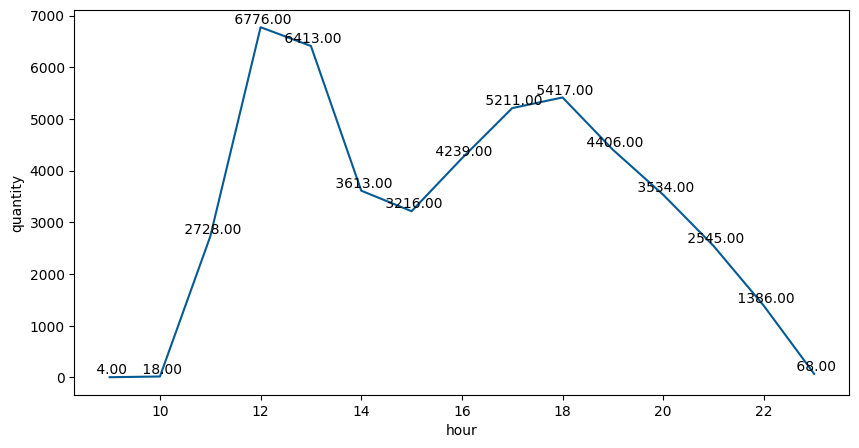

In [ ]:
pizza_sales['order_time']=pd.to_datetime(pizza_sales['order_time'],format='%H:%M:%S')
pizza_sales['hour']=pizza_sales['order_time'].dt.hour
chart=pizza_sales.groupby('hour',as_index=False)['quantity'].sum()
plt.figure(figsize=(10,5))
sns.lineplot(data=chart,x='hour',y='quantity',color='#045a93')
for x,y in enumerate(chart['quantity']):
    right_x=chart['hour'].iloc[x]
    plt.text(right_x,y,f'{y: .2f}',ha='center',va='bottom')

/tmp/ipython-input-1892692904.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  chart=pizza_sales.groupby('month_name',as_index=False)['quantity'].sum()
/tmp/ipython-input-1892692904.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart,x='month_name',y='quantity',palette='magma')


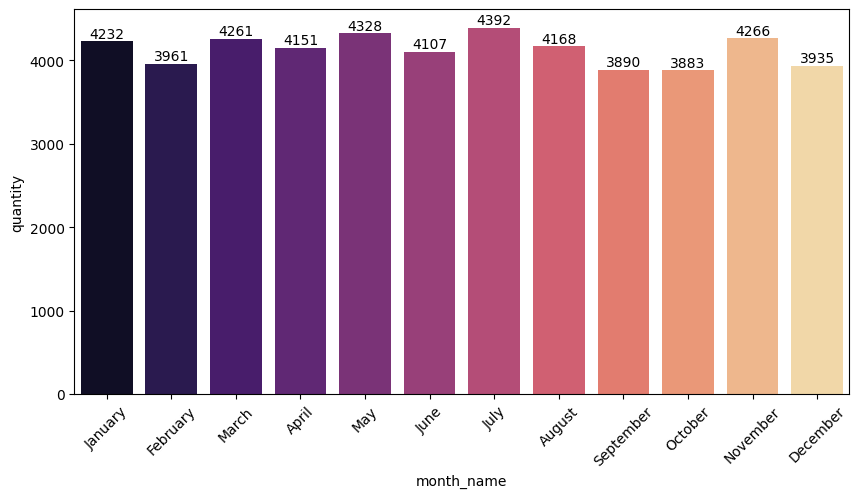

In [ ]:
pizza_sales['order_date']=pd.to_datetime(pizza_sales['order_date'],dayfirst=True)
pizza_sales['month_name']=pizza_sales['order_date'].dt.month_name()
month=['January','February','March','April','May','June','July','August','September','October','November','December']
pizza_sales['month_name']=pd.Categorical(pizza_sales['month_name'],categories=month,ordered=True)
chart=pizza_sales.groupby('month_name',as_index=False)['quantity'].sum()
plt.figure(figsize=(10,5))
sns.barplot(data=chart,x='month_name',y='quantity',palette='magma')
plt.xticks(rotation=45)

for x,y in enumerate(chart['quantity']):
    plt.text(x,y,y,ha='center',va='bottom')

% of total_price by category

([<matplotlib.patches.Wedge at 0x7d743fe86480>,
 [Text(-0.7518710008417829, 0.8029258982578503, 'Chicken'),
  Text(-0.782295103548908, -0.7733138890278666, 'Classic'),
  Text(0.8291886537757752, -0.7228043832528396, 'Supreme'),
  Text(0.7449685909478783, 0.8093341698588618, 'Veggie')],
 [Text(-0.4101114550046088, 0.43795958086791836, '24.0%'),
  Text(-0.42670642011758614, -0.42180757583338174, '26.9%'),
  Text(0.4522847202413319, -0.39425693631973063, '25.5%'),
  Text(0.4063465041533881, 0.4414550017411973, '23.7%')])

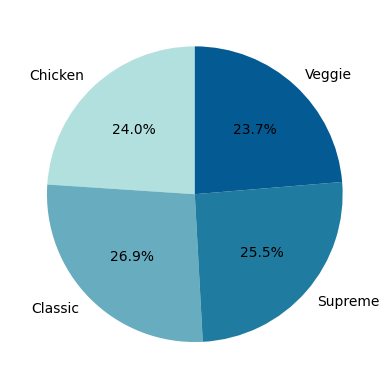

In [ ]:
category_Rev=pizza_sales.groupby('pizza_category',as_index=False)['total_price'].sum()
# % Rev_category=category_Rev/category_Rev[total_price].sum()*100
Percentage=category_Rev['total_price']/category_Rev['total_price'].sum()*100
plt.pie(
    Percentage,
    labels=category_Rev['pizza_category'],
    autopct='%1.1f%%',
    colors=['#b2e0de','#68adbf','#1f7ca0','#045a93'],
    startangle=90
)

% of sales by pizza category and size

<Axes: xlabel='pizza_size', ylabel='pizza_category'>

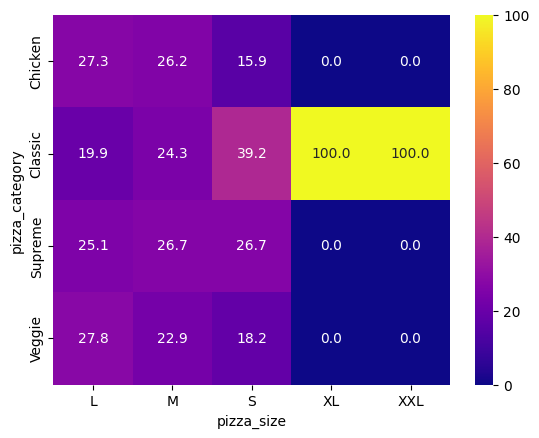

In [ ]:
sales_pivot=pizza_sales.pivot_table(
    index='pizza_category',
    columns='pizza_size',
    values='total_price',
    aggfunc='sum'
)
Percentage=sales_pivot/sales_pivot.sum()*100
sns.heatmap(Percentage.fillna(0),annot=True,fmt='.1f',cmap='plasma')


Total pizza sold by Each category

/tmp/ipython-input-3891115233.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=chart,x='pizza_category',y='quantity',palette='magma')


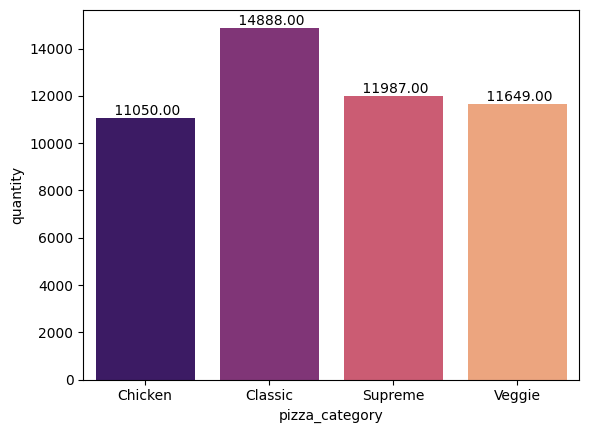

In [ ]:
chart=pizza_sales.groupby('pizza_category',as_index=False)['quantity'].sum()
sns.barplot(data=chart,x='pizza_category',y='quantity',palette='magma')
for x,y in enumerate(chart['quantity']):
    right_x=chart['pizza_category'].iloc[x]
    plt.text(right_x,y,f'{y: .2f}',ha='center',va='bottom')

To 5 selling

/tmp/ipython-input-453325619.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5,x='pizza_name',y='quantity',palette='magma')


([0, 1, 2, 3, 4],
 [Text(0, 0, 'The Classic Deluxe Pizza'),
  Text(1, 0, 'The Barbecue Chicken Pizza'),
  Text(2, 0, 'The Hawaiian Pizza'),
  Text(3, 0, 'The Pepperoni Pizza'),
  Text(4, 0, 'The Thai Chicken Pizza')])

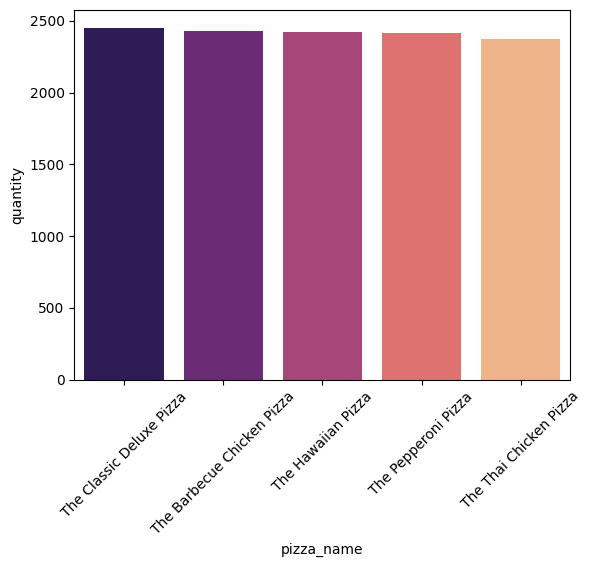

In [ ]:
chart=pizza_sales.groupby('pizza_name',as_index=False)['quantity'].sum()
top_5=chart.sort_values(by='quantity',ascending=False).head()
sns.barplot(data=top_5,x='pizza_name',y='quantity',palette='magma')
plt.xticks(rotation=45)

botoom 5

/tmp/ipython-input-1214175969.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_5,y='pizza_name',x='quantity',palette='magma')


(array([   0.,  200.,  400.,  600.,  800., 1000., 1200.]),
 [Text(0.0, 0, '0'),
  Text(200.0, 0, '200'),
  Text(400.0, 0, '400'),
  Text(600.0, 0, '600'),
  Text(800.0, 0, '800'),
  Text(1000.0, 0, '1000'),
  Text(1200.0, 0, '1200')])

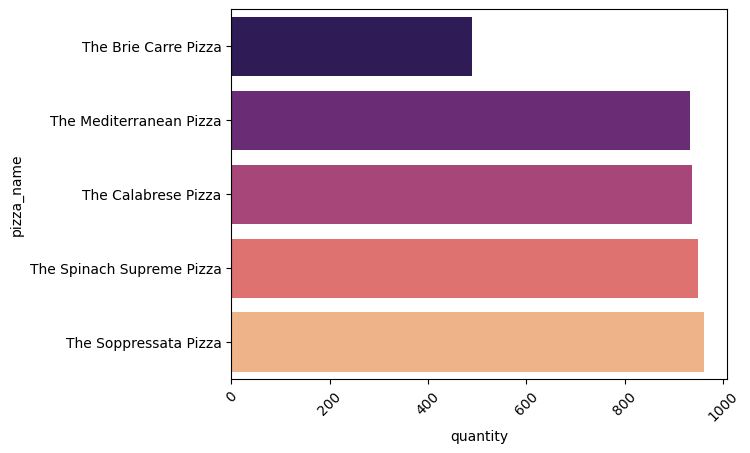

In [ ]:
chart=pizza_sales.groupby('pizza_name',as_index=False)['quantity'].sum()
top_5=chart.sort_values(by='quantity',ascending=True).head()
sns.barplot(data=top_5,y='pizza_name',x='quantity',palette='magma')
plt.xticks(rotation=45)